File to see if there are any trends, seasonality or cycles visible in this time series data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
y = pd.read_csv('data/dengue_labels_train.csv')
y.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_20932\2837670294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_sj['time'] = np.arange(y_sj.shape[0])
C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_20932\2837670294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_iq['time'] = np.arange(y_iq.shape[0])


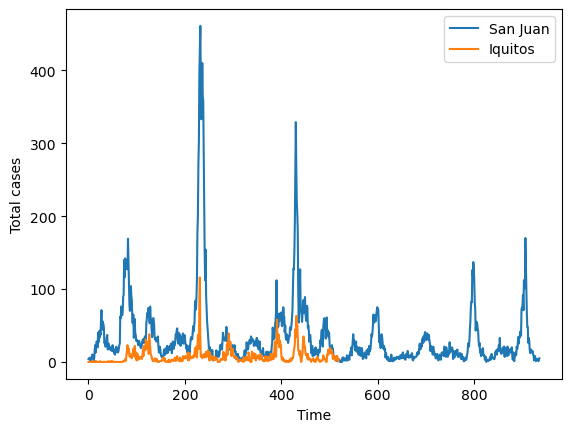

In [3]:
# Split per city
y_sj = y[y['city'] == 'sj']
y_iq = y[y['city'] == 'iq']

# Add a time dummy
y_sj['time'] = np.arange(y_sj.shape[0])
y_iq['time'] = np.arange(y_iq.shape[0])

# Plot the number of cases over time, for each city
sns.lineplot(x='time', y='total_cases', data=y_sj, label='San Juan')
sns.lineplot(x='time', y='total_cases', data=y_iq, label='Iquitos')
plt.ylabel('Total cases')
plt.xlabel('Time')
plt.legend()
plt.show()

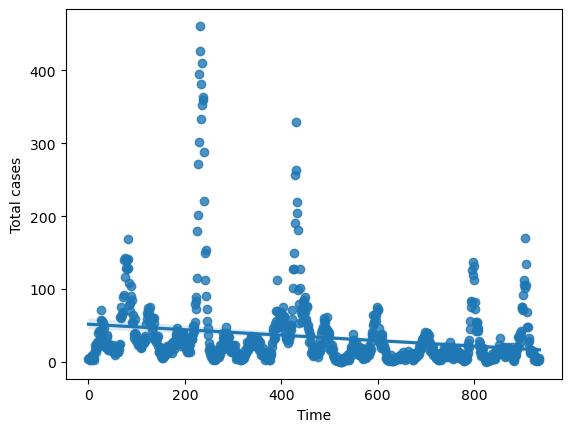

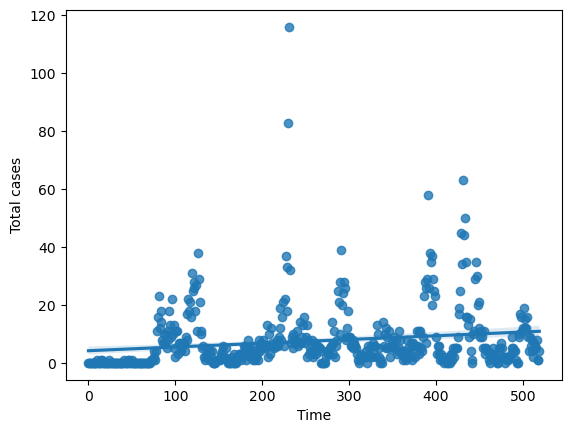

In [4]:
# Plot with trend line
sns.regplot(x='time', y='total_cases', data=y_sj)
plt.ylabel('Total cases')
plt.xlabel('Time')
plt.show()

sns.regplot(x='time', y='total_cases', data=y_iq)
plt.ylabel('Total cases')
plt.xlabel('Time')
plt.show()

C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_20932\632059870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_sj['total_cases_moving_avg'] = y_sj['total_cases'].rolling(window=100, center=True).mean()
C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_20932\632059870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_iq['total_cases_moving_avg'] = y_iq['total_cases'].rolling(window=100, center=True).mean()


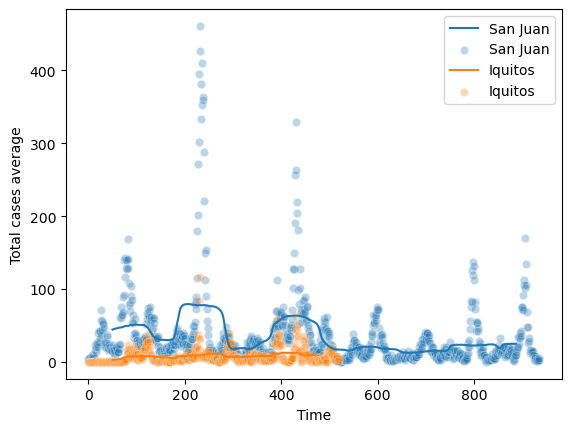

In [5]:
# Moving average
y_sj['total_cases_moving_avg'] = y_sj['total_cases'].rolling(window=100, center=True).mean()
y_iq['total_cases_moving_avg'] = y_iq['total_cases'].rolling(window=100, center=True).mean()

sns.lineplot(x='time', y='total_cases_moving_avg', data=y_sj, label='San Juan')
sns.scatterplot(x='time', y='total_cases', data=y_sj, label='San Juan', alpha=0.3)
sns.lineplot(x='time', y='total_cases_moving_avg', data=y_iq, label='Iquitos')
sns.scatterplot(x='time', y='total_cases', data=y_iq, label='Iquitos', alpha=0.3)
plt.ylabel('Total cases average')
plt.xlabel('Time')
plt.legend()
plt.show()

Although the trend lines are not flat, it seems like this is caused by the peaks being higher or lower at the start and end, rather than an actual trend. Additionally the moving average shows peaks due to the large peaks in the data, but no clear increase. So there does not seem to be a trend. This makes sense, as you don't expect a general increase in disease cases as time goes on.

Next look for seasonality.

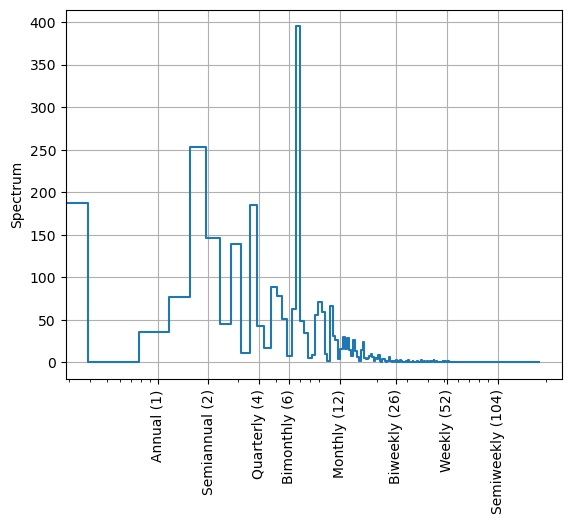

In [6]:
# Periodogram
fs = pd.Timedelta("365D") / pd.Timedelta("1D")
freq_sj, spectrum_sj = periodogram(y_sj['total_cases'], fs=fs, scaling='spectrum')

plt.step(freq_sj, spectrum_sj)
plt.xscale('log')
plt.xticks([1, 2, 4, 6, 12, 26, 52, 104], 
           labels=[
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
           ],
           rotation=90)
plt.grid()
#plt.xlabel('Frequency')
plt.ylabel('Spectrum')	
plt.show()

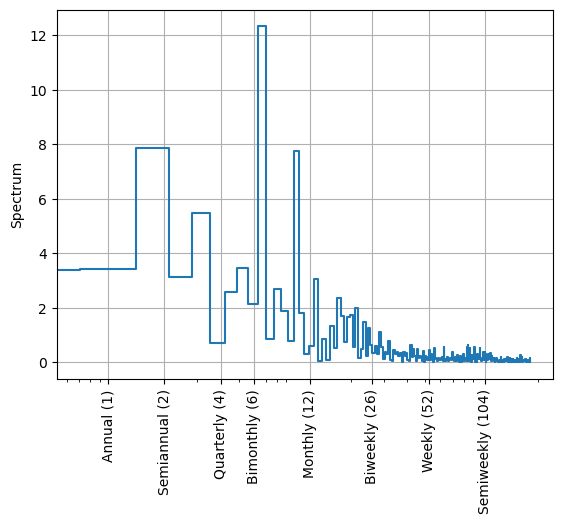

In [7]:
# For Iquitos
freq_iq, spectrum_iq = periodogram(y_iq['total_cases'], fs=fs, scaling='spectrum')

plt.step(freq_iq, spectrum_iq)
plt.xscale('log')
plt.xticks([1, 2, 4, 6, 12, 26, 52, 104], 
           labels=[
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
           ],
           rotation=90)
plt.grid()
#plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.show()

Next look at what lag features we want to create, using the partial autocorrelation.

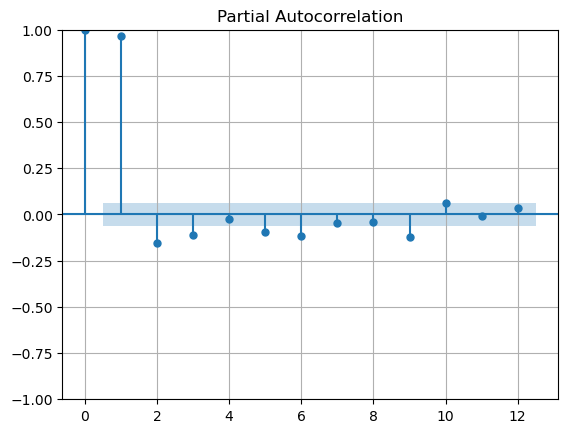

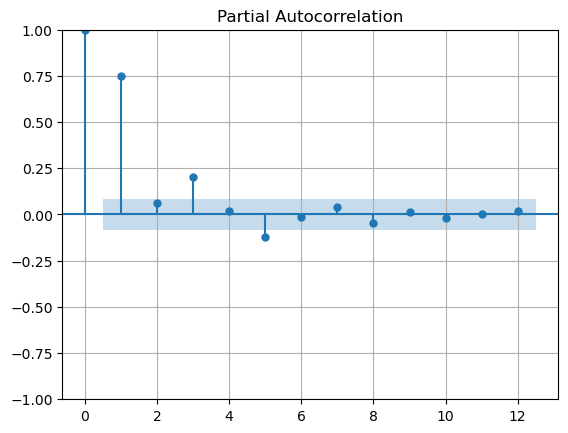

In [11]:
plot_pacf(y_sj['total_cases'], lags=12)
plt.grid()
plt.show()

plot_pacf(y_iq['total_cases'], lags=12)
plt.grid()
plt.show()

Seems like for sj lags 1, 2, 3, 5, 6, 9 are important.

While for iq only lags 1, 3, 5 are important.